In [86]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool
from imblearn.over_sampling import SMOTE
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [87]:
# a = []
# while(1):
#     a.append('1')

In [88]:
data = pd.read_csv('/content/Train_data.csv')

In [89]:
data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,4,10,4,12,4,11,4,5,4,4,5
1,1,7,3,6,4,1,2,2,1,12,0
2,4,8,1,8,3,1,1,1,2,11,2
3,1,6,2,4,3,4,2,5,2,6,2
4,3,11,2,11,1,12,3,4,2,12,2


In [90]:
data.isnull().sum()

S1       0
C1       0
S2       0
C2       0
S3       0
C3       0
S4       0
C4       0
S5       0
C5       0
Class    0
dtype: int64

In [91]:
data['S1'].value_counts()

4    42078
3    41830
1    41761
2    41739
Name: S1, dtype: int64

In [92]:
for cols in data:
  print('#######################################################')
  print (data[cols].value_counts())
 

#######################################################
4    42078
3    41830
1    41761
2    41739
Name: S1, dtype: int64
#######################################################
6     13070
4     13040
5     12972
10    12933
12    12909
3     12905
8     12887
7     12877
1     12844
13    12803
11    12799
2     12718
9     12651
Name: C1, dtype: int64
#######################################################
4    42052
2    41939
1    41782
3    41635
Name: S2, dtype: int64
#######################################################
6     13024
12    12996
9     12961
2     12939
4     12922
5     12898
11    12895
8     12871
3     12859
7     12835
13    12803
1     12780
10    12625
Name: C2, dtype: int64
#######################################################
4    41942
3    41931
1    41837
2    41698
Name: S3, dtype: int64
#######################################################
7     13198
12    13050
13    12986
6     12971
5     12909
10    12894
8     12885
11    12868
3     128

In [93]:
data.corr()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
S1,1.000000,0.000137,-0.033031,0.002098,-0.025084,0.000676,-0.024838,0.001811,-0.026738,0.002178,0.001097
C1,0.000137,1.000000,-0.004366,0.040017,-0.001307,0.038659,0.002283,0.044031,0.001491,0.042783,0.009932
S2,-0.033031,-0.004366,1.000000,0.000106,-0.028673,0.002661,-0.025831,-0.002262,-0.033527,-0.000410,0.000515
C2,0.002098,0.040017,0.000106,1.000000,-0.002632,0.038184,-0.001073,0.039002,0.003498,0.040925,0.008188
S3,-0.025084,-0.001307,-0.028673,-0.002632,1.000000,0.000084,-0.026319,-0.000057,-0.029617,0.001552,0.003293
C3,0.000676,0.038659,0.002661,0.038184,0.000084,1.000000,0.000804,0.040833,0.003057,0.038754,0.004556
S4,-0.024838,0.002283,-0.025831,-0.001073,-0.026319,0.000804,1.000000,-0.000481,-0.029154,-0.004051,-0.003348
C4,0.001811,0.044031,-0.002262,0.039002,-0.000057,0.040833,-0.000481,1.000000,-0.001265,0.042555,0.006272
S5,-0.026738,0.001491,-0.033527,0.003498,-0.029617,0.003057,-0.029154,-0.001265,1.000000,-0.000634,-0.003437
C5,0.002178,0.042783,-0.000410,0.040925,0.001552,0.038754,-0.004051,0.042555,-0.000634,1.000000,0.003513


In [94]:
for cols in data:
  print('                                                                            ')
  print('############################################################################')
  print('                                                                            ')
  print (data[cols].unique()) 

                                                                            
############################################################################
                                                                            
[4 1 3 2]
                                                                            
############################################################################
                                                                            
[10  7  8  6 11  1  5  2  3  9 12 13  4]
                                                                            
############################################################################
                                                                            
[4 3 1 2]
                                                                            
############################################################################
                                                                            
[12  6  8  4 11

In [95]:
# !pip install pandas-profiling

In [96]:
from pandas_profiling import ProfileReport

In [97]:
 !pip install pandas-profiling==2.7.1 

In [98]:
profile = ProfileReport(data)

In [99]:
profile.to_file(output_file='data.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
p = data.drop_duplicates()

In [101]:
p

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,4,10,4,12,4,11,4,5,4,4,5
1,1,7,3,6,4,1,2,2,1,12,0
2,4,8,1,8,3,1,1,1,2,11,2
3,1,6,2,4,3,4,2,5,2,6,2
4,3,11,2,11,1,12,3,4,2,12,2
...,...,...,...,...,...,...,...,...,...,...,...
167403,1,1,1,10,3,5,3,10,2,10,3
167404,2,2,4,9,3,3,2,13,1,5,0
167405,4,11,1,2,4,10,3,2,3,11,2
167406,1,10,3,10,2,7,4,2,4,10,3


In [108]:
 from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()

In [110]:
cols_to_scale = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']

In [111]:
cols_to_scale = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
scaler = MinMaxScaler()
p[cols_to_scale] = scaler.fit_transform(p[cols_to_scale])

In [112]:
p.corr()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
S1,1.000000,0.000222,-0.033011,0.002098,-0.025162,0.000804,-0.024892,0.001856,-0.026793,0.002197,0.001171
C1,0.000222,1.000000,-0.004438,0.039883,-0.001269,0.038558,0.002272,0.043911,0.001543,0.042755,0.009947
S2,-0.033011,-0.004438,1.000000,-0.000008,-0.028600,0.002501,-0.025804,-0.002170,-0.033563,-0.000478,0.000442
C2,0.002098,0.039883,-0.000008,1.000000,-0.002641,0.038105,-0.001010,0.038987,0.003559,0.040886,0.008166
S3,-0.025162,-0.001269,-0.028600,-0.002641,1.000000,0.000108,-0.026329,-0.000003,-0.029625,0.001541,0.003288
C3,0.000804,0.038558,0.002501,0.038105,0.000108,1.000000,0.000863,0.040757,0.003047,0.038627,0.004515
S4,-0.024892,0.002272,-0.025804,-0.001010,-0.026329,0.000863,1.000000,-0.000446,-0.029215,-0.004080,-0.003307
C4,0.001856,0.043911,-0.002170,0.038987,-0.000003,0.040757,-0.000446,1.000000,-0.001231,0.042607,0.006315
S5,-0.026793,0.001543,-0.033563,0.003559,-0.029625,0.003047,-0.029215,-0.001231,1.000000,-0.000595,-0.003589
C5,0.002197,0.042755,-0.000478,0.040886,0.001541,0.038627,-0.004080,0.042607,-0.000595,1.000000,0.003442


In [113]:
p.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1.000000,0.750000,1.000000,0.916667,1.000000,0.833333,1.000000,0.333333,1.000000,0.250000,5
1,0.000000,0.500000,0.666667,0.416667,1.000000,0.000000,0.333333,0.083333,0.000000,0.916667,0
2,1.000000,0.583333,0.000000,0.583333,0.666667,0.000000,0.000000,0.000000,0.333333,0.833333,2
3,0.000000,0.416667,0.333333,0.250000,0.666667,0.250000,0.333333,0.333333,0.333333,0.416667,2
4,0.666667,0.833333,0.333333,0.833333,0.000000,0.916667,0.666667,0.250000,0.333333,0.916667,2


In [114]:
# pip install lazypredict

In [115]:
# import lazypredict

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
# from lazypredict.Supervised import LazyClassifier

In [118]:
X = p.drop('Class',axis=1)
y= p['Class']



In [119]:
X

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1.000000,0.750000,1.000000,0.916667,1.000000,0.833333,1.000000,0.333333,1.000000,0.250000
1,0.000000,0.500000,0.666667,0.416667,1.000000,0.000000,0.333333,0.083333,0.000000,0.916667
2,1.000000,0.583333,0.000000,0.583333,0.666667,0.000000,0.000000,0.000000,0.333333,0.833333
3,0.000000,0.416667,0.333333,0.250000,0.666667,0.250000,0.333333,0.333333,0.333333,0.416667
4,0.666667,0.833333,0.333333,0.833333,0.000000,0.916667,0.666667,0.250000,0.333333,0.916667
...,...,...,...,...,...,...,...,...,...,...
167403,0.000000,0.000000,0.000000,0.750000,0.666667,0.333333,0.666667,0.750000,0.333333,0.750000
167404,0.333333,0.083333,1.000000,0.666667,0.666667,0.166667,0.333333,1.000000,0.000000,0.333333
167405,1.000000,0.833333,0.000000,0.083333,1.000000,0.750000,0.666667,0.083333,0.666667,0.833333
167406,0.000000,0.750000,0.666667,0.750000,0.333333,0.500000,1.000000,0.083333,1.000000,0.750000


In [120]:
y

0         5
1         0
2         2
3         2
4         2
         ..
167403    3
167404    0
167405    2
167406    3
167407    2
Name: Class, Length: 167280, dtype: int64

In [132]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=5, n=56234 (10.000%)
Class=0, n=56234 (10.000%)
Class=2, n=56234 (10.000%)
Class=1, n=56234 (10.000%)
Class=3, n=56234 (10.000%)
Class=4, n=56234 (10.000%)
Class=6, n=56234 (10.000%)
Class=7, n=56234 (10.000%)
Class=8, n=56234 (10.000%)
Class=9, n=56234 (10.000%)


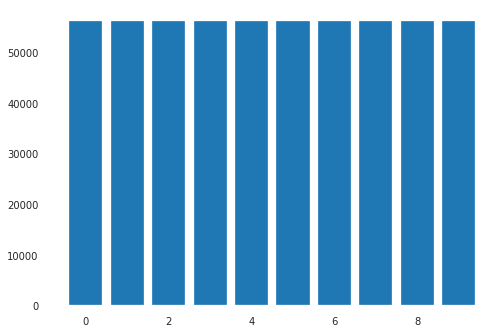

In [133]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =23)


In [135]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [136]:
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [137]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [138]:
X_train.shape

(421755, 10)

In [168]:
lr = DecisionTreeClassifier()

In [169]:
lr.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [170]:
pred = lr.predict(X_test)

In [171]:
X_train.shape


(421755, 10)

In [185]:
y_train.shape

(421755,)

In [186]:
# import mean squared error from sklearn.metric
from sklearn.metrics import accuracy_score

In [187]:
print('Accuracy Score is: ', accuracy_score(y_test, pred))

# y_val is the original target value of the validation set (X_val)
# pred is the predicted target value of the validation set

Accuracy Score is:  0.7921684390226553


In [175]:
from sklearn.metrics import f1_score

In [176]:
print('f1 Score is: ', f1_score(y_test, pred, average='macro'))

# y_val is the original target value of the validation set (X_val)
# pred is the predicted target value of the validation set

f1 Score is:  0.7896973306472715


In [177]:
test_data = pd.read_csv('Test_data.csv')

In [178]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55803 entries, 0 to 55802
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      55803 non-null  int64
 1   C1      55803 non-null  int64
 2   S2      55803 non-null  int64
 3   C2      55803 non-null  int64
 4   S3      55803 non-null  int64
 5   C3      55803 non-null  int64
 6   S4      55803 non-null  int64
 7   C4      55803 non-null  int64
 8   S5      55803 non-null  int64
 9   C5      55803 non-null  int64
dtypes: int64(10)
memory usage: 4.3 MB


In [179]:
cols_to_scale = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
scaler = MinMaxScaler()
test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])

In [180]:
target = lr.predict(test_data)

In [181]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
import pickle

In [183]:
# Saving model to disk
pickle.dump(lr, open('model.pkl','wb'))